In [1]:
import datetime

#from   mpl_finance import quotes_historical_yahoo_ochl as yahoo_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as get_data
from   scipy import stats

%matplotlib inline

In [2]:
!ls ../../../data

IBM_monthly.csv                         ffMonthly.pkl
Monthly_CO2_Concentrations.csv          inflation-consumer-prices-annual.csv
Superstore.xls                          mean-daily-temperature-fisher-river.csv
beerprod.dat                            or_monthly_mean_temp_1895-2019.csv
chemical-concentration-readings.csv     or_monthly_mean_temp_1895-2019.txt
coloradoflow.dat


In [3]:
DATA = '../../../data'

In [4]:
x = pd.read_csv(f'{DATA}/IBM_monthly.csv', parse_dates=True)
x.rename(columns={'Adj Close': 'AdjClose'}, inplace=True)
x.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,1962-01-01,7.713333,7.713333,7.003334,7.226666,0.598839,8760000
1,1962-02-01,7.300000,7.480000,7.093333,7.160000,0.593315,5737600
2,1962-03-01,7.186666,7.413333,7.070000,7.103333,0.588699,5344000
3,1962-04-01,7.100000,7.100000,6.000000,6.053333,0.501678,12851200
4,1962-05-01,6.053333,6.530000,4.733333,5.233333,0.433720,49307200


In [5]:
beg_date = datetime.datetime(1962, 11, 1)
end_date = datetime.datetime(2019, 9, 9)

In [6]:
#df = get_data.get_data_google('IBM', beg_date, end_date)
#df.head()

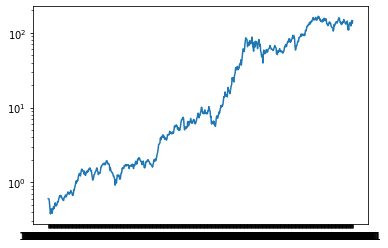

In [7]:
plt.plot(x.Date, x.AdjClose)
plt.yscale('log');

In [8]:
x.AdjClose[1] / x.AdjClose[0] - 1

-0.009224516105330594

In [9]:
x['ret'] = 0
for i in range(x.shape[0]):
    if i == 0:
        x.loc[i, 'ret'] = np.nan
    else:
        x.loc[i, 'ret'] = (x.loc[i, 'AdjClose'] / x.loc[i - 1, 'AdjClose']
                           - 1)

In [10]:
print(f'{x.ret.mean():.5f}')

0.01032


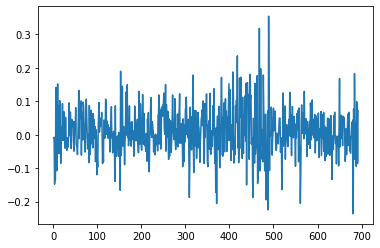

In [11]:
plt.plot(x.ret);

### Data from Google Finance

In [12]:
aapl = get_data.DataReader('AAPL', 'google')

ImmediateDeprecationError: 
Google finance has been immediately deprecated due to large breaks in the API without the
introduction of a stable replacement. Pull Requests to re-enable these data
connectors are welcome.

See https://github.com/pydata/pandas-datareader/issues


### Data from FRED

In [13]:
vix = get_data.DataReader('VIXCLS', 'fred')
vix.head()

,VIXCLS
DATE,
2010-01-01,NaN
2010-01-04,20.04
2010-01-05,19.35
2010-01-06,19.16
2010-01-07,19.06


### Data from Professor French's Library

In [14]:
ff = get_data.DataReader('F-F_Research_Data_Factors', 'famafrench')
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 2010-01   -3.36  0.38  0.30  0.00
 2010-02    3.40  1.21  3.16  0.00
 2010-03    6.31  1.43  2.11  0.01
 2010-04    2.00  4.97  2.81  0.01
 2010-05   -7.89  0.05 -2.38  0.01
 ...         ...   ...   ...   ...
 2019-04    3.96 -1.68  1.93  0.21
 2019-05   -6.94 -1.20 -2.39  0.21
 2019-06    6.93  0.33 -1.08  0.18
 2019-07    1.19 -2.07  0.14  0.19
 2019-08   -2.58 -2.42 -4.99  0.16
 
 [116 rows x 4 columns], 1:       Mkt-RF    SMB    HML    RF
 Date                            
 2010   17.37  13.78  -5.31  0.12
 2011    0.44  -6.06  -8.39  0.04
 2012   16.28  -1.27   9.75  0.06
 2013   35.20   7.18   1.50  0.02
 2014   11.70  -8.07  -1.67  0.02
 2015    0.07  -4.06  -9.63  0.02
 2016   13.30   6.61  22.91  0.20
 2017   21.50  -4.81 -13.92  0.80
 2018   -6.93  -3.57  -9.22  1.81, 'DESCR': 'F-F Research Data Factors\n-------------------------\n\nThis file was created by CMPT_ME_BEME_RETS using the 201908 CRSP databas

In [15]:
ff2 = get_data.DataReader('F-F_Research_Data_Factors_weekly', 
                          'famafrench')
ff2

{0:             Mkt-RF   SMB   HML     RF
 Date                                 
 2010-01-08    2.89  0.26  3.90  0.001
 2010-01-15   -0.91  0.11 -1.51  0.001
 2010-01-22   -3.57  0.84 -1.86  0.001
 2010-01-29   -1.70 -0.75  0.08  0.001
 2010-02-05   -0.81 -0.71 -0.17  0.000
 ...            ...   ...   ...    ...
 2019-08-02   -3.45  0.32 -0.98  0.041
 2019-08-09   -0.61 -0.68 -2.07  0.041
 2019-08-16   -1.17  0.25 -1.28  0.041
 2019-08-23   -1.57 -0.77 -0.24  0.041
 2019-08-30    2.70 -0.52  0.32  0.041
 
 [504 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors weekly\n--------------------------------\n\nThis file was created by CMPT_ME_BEME_RETS_WEEKLY using the 201908 CRSP database. The Tbill return is the weekly rate that, over four weeks, compounds to 1-month TBill rate from Ibbotson and Associates Inc. Copyright 2019 Kenneth R. French\n\n  0 : (504 rows x 4 cols)'}

In [16]:
ff3 = get_data.DataReader('6_Portfolios_2x3', 'famafrench')
ff3

{0:          SMALL LoBM  ME1 BM2  SMALL HiBM  BIG LoBM  ME2 BM2  BIG HiBM
 Date                                                                 
 2010-01     -3.6856  -3.0285     -2.7808   -4.0577  -2.2286   -4.3552
 2010-02      3.4717   3.9519      7.5523    3.1401   2.8337    5.3835
 2010-03      7.0506   8.0982      8.8878    5.3091   6.7391    7.6899
 2010-04      4.1833   6.1181      9.3935    0.9872   2.3956    1.3958
 2010-05     -6.0381  -7.0571    -10.4467   -7.4415  -8.4347   -7.8024
 ...             ...      ...         ...       ...      ...       ...
 2019-04      2.4292   4.1192      3.1520    4.1964   3.1897    7.3419
 2019-05     -7.1011  -8.1733     -9.8636   -6.4300  -6.6596   -8.4482
 2019-06      8.3483   7.6431      6.3579    7.1503   7.2143    6.9804
 2019-07     -0.6533   0.5307     -1.0465    1.8013   0.7627    2.4796
 2019-08     -4.1131  -5.9850     -8.2893   -1.0486  -3.2257   -6.8615
 
 [116 rows x 6 columns],
 1:          SMALL LoBM  ME1 BM2  SMALL HiBM  B

In [17]:
ff4 = get_data.DataReader('F-F_ST_Reversal_Factor', 'famafrench')
ff4

{0:          ST_Rev
 Date           
 2010-01    3.64
 2010-02    1.80
 2010-03    0.77
 2010-04   -1.77
 2010-05    0.58
 ...         ...
 2019-04    0.92
 2019-05    0.62
 2019-06    3.81
 2019-07   -0.17
 2019-08   -2.51
 
 [116 rows x 1 columns], 1:       ST_Rev
 Date        
 2010    9.53
 2011   -7.81
 2012    6.71
 2013   -1.21
 2014   -2.50
 2015    0.71
 2016    6.18
 2017    2.86
 2018    3.14, 'DESCR': 'F-F ST Reversal Factor\n----------------------\n\nThis file was created by CMPT_ME_PRIOR_RETS using the 201908 CRSP database. It contains a momentum factor, constructed from six value-weight portfolios formed using independent sorts on size and prior return of NYSE, AMEX, and NASDAQ stocks. ST_Rev is the average of the returns on two (big and small) low prior return portfolios minus the average of the returns on two high prior return portfolios. The portfolios are constructed monthly. Big means a firm is above the median market cap on the NYSE at the end of the previous month

### Census Bureau, Treasury, and BLS Stats
- http://www.census.gov/compendia/statab/hist_stats.html
- http://www.census.gov/econ/census/data/historical_data.html
- http://www.bls.gov/

### Generating 2 Dozen Data Sets
- Data: http://canisius.edu/~yany/python/ffMonthly.pkl

In [18]:
#!mv /Users/dsatterthwaite/Downloads/ffMonthly.pkl ../../../data/

In [19]:
#!ls ../../../data

In [20]:
ff = pd.read_pickle('../../../data/ffMonthly.pkl')
ff.head()

,MKT_RF,SMB,HML,RF
192607,0.0296,-0.0230,-0.0287,0.0022
192608,0.0264,-0.0140,0.0419,0.0025
192609,0.0036,-0.0132,0.0001,0.0023
192610,-0.0324,0.0004,0.0051,0.0032
192611,0.0253,-0.0020,-0.0035,0.0031


### CRSP and Compustat Data
-  http://www.crsp.com/
- https://www.spglobal.com/marketintelligence/en/?product=compustat-research-insight